# House Sales Streamlit Dashboard

## Project Solution Planning

### Inputs

1. Business problem:
    - House Rocket is a digital platform whose business model is the purchase and sale of real estate using technology.
    - My goal is to help the company find the best business opportunities in the real estate market. The CEO of House Rocket would like to maximize the company's revenue by finding good business opportunities.
    - Their main strategy is to buy good homes in great locations at low prices and then resell them later at higher prices. The greater the difference between buying and selling, the greater the company's profit and therefore the greater its revenue.
    - The dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

### Outputs

1. A dashboard that CEO could access remotely that contains:
    -  Which houses should the House Rocket CEO buy and at what purchase price?
    - Once the house is in the company's possession, when is the best time to sell it and what would the sale price be?

### Tasks

# Imports

In [1]:
import pandas              as pd
import numpy               as np
import seaborn             as sns
import plotly.express      as px
import matplotlib.gridspec as gridspec
import panel               as pn
import ipywidgets          as widgets

import os
import folium

from folium.plugins          import MarkerCluster
from IPython.core.display    import HTML
from IPython.display         import Image
from geopy.geocoders         import Nominatim 

## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Loading Data

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

source:
https://www.kaggle.com/harlfoxem/housesalesprediction

In [6]:
# load data
data_raw = pd.read_csv('/home/marxcerqueira/repos/analytics-streamlit-dashboard/kc_house_data.csv')

In [7]:
data_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Description

In [10]:
# make a copy of dataset to personal management
df0 = data_raw.copy()

## Features Summary

- id - Unique ID for each home sold
- date - Date of the home sale
- price - Price of each home sold
- bedrooms - Number of bedrooms
- bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living - Square footage of the apartments interior living space
- sqft_lot - Square footage of the land space
- floors - Number of floors
- waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
- view - An index from 0 to 4 of how good the view of the property was
- condition - An index from 1 to 5 on the condition of the apartment,
- grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above - The square footage of the interior housing space that is above ground level
- sqft_basement - The square footage of the interior housing space that is below ground level
- yr_built - The year the house was initially built
- yr_renovated - The year of the house’s last renovation
- zipcode - What zipcode area the house is in
- lat - Lattitude
- long - Longitude
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

verified from 2 sources:
https://www.slideshare.net/PawanShivhare1/predicting-king-county-house-prices
https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.htm



## Data Dimension

In [11]:
print('Dataset rows: {}'.format(df0.shape[0]))
print('Dataset columns: {}'.format(df0.shape[1]))

Dataset rows: 21613
Dataset columns: 21


## Data Types

In [12]:
df0.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [17]:
df0.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Check NA values

In [16]:
missing_count = df0.isna().sum() #count of missing values
value_count = df0.isna().count() #count of total dataset rows

missing_percentage = round(missing_count/value_count*100, 2) # percentage of missing values
missing_df = pd.DataFrame({'missing count': missing_count, 'percentage:': missing_percentage})
missing_df

,missing count,percentage:
id,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0


## Change Dtypes

In [18]:
# change dtypes for future calculations
df0['date'] = pd.to_datetime(df0['date'])

In [19]:
df0.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## Drop Duplicates

In [43]:
# looking for duplicated houses ID's
df0['id'].duplicated(keep = 'first').sum()

177

In [44]:
df0[df0['id'].duplicated(keep='first')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
718,8820903380,2015-01-02,730000.0,6,2.25,2660,13579,2.0,0,0,3,7,2660,0,1937,1990,98125,47.7142,-122.286,1120,8242
824,726049190,2015-02-18,431000.0,3,1.00,1810,7200,1.0,0,0,4,7,1130,680,1954,0,98133,47.7493,-122.351,1810,8100
837,8682262400,2015-05-13,419950.0,2,1.75,1350,4003,1.0,0,0,3,8,1350,0,2004,0,98053,47.7176,-122.033,1350,4479
1086,9834200885,2015-04-20,550000.0,4,2.50,2080,4080,1.0,0,0,5,7,1040,1040,1962,0,98144,47.5720,-122.290,1340,4080
1129,8062900070,2015-02-13,369000.0,5,1.50,2550,6300,1.0,0,0,4,7,1560,990,1959,0,98056,47.5014,-122.172,1380,6300


In [45]:
# dropping duplicated rows
df0 = df0.drop_duplicates(subset = 'id', keep = 'first')

In [46]:
df0.shape

(21436, 21)

## Descriptive Statistics

In [47]:
# it's usefull to get the first knowledge of the bussiness problem and the dataset features
# it can detect some data erros

In [48]:
# separate numerical and categorical attributes for descriptive analysis

num_attributes = df0.select_dtypes(include = np.number)
cat_attributes = df0.select_dtypes(exclude = [np.number, np.datetime64])

### Numerical Attributes

In [49]:
# Central Tendency - Mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtoisis
d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( min )).T
d3 = pd.DataFrame(num_attributes.apply( max )).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )).T

#concatenate
m1 = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()


m1.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m1

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000102e+06,9.900000e+09,9.899000e+09,4.580765e+09,3.904921e+09,2.876523e+09,0.243231,-1.260565
1,price,7.500000e+04,7.700000e+06,7.625000e+06,5.405293e+05,4.500000e+05,3.676807e+05,4.028488,34.619079
2,bedrooms,0.000000e+00,3.300000e+01,3.300000e+01,3.371571e+00,3.000000e+00,9.291830e-01,1.989860,49.638224
3,bathrooms,0.000000e+00,8.000000e+00,8.000000e+00,2.117349e+00,2.250000e+00,7.698948e-01,0.510181,1.291488
4,sqft_living,2.900000e+02,1.354000e+04,1.325000e+04,2.082705e+03,1.920000e+03,9.191250e+02,1.471021,5.249076
5,sqft_lot,5.200000e+02,1.651359e+06,1.650839e+06,1.513564e+04,7.614000e+03,4.153765e+04,13.043673,284.083543
6,floors,1.000000e+00,3.500000e+00,2.500000e+00,1.496198e+00,1.500000e+00,5.403758e-01,0.610479,-0.490774
7,waterfront,0.000000e+00,1.000000e+00,1.000000e+00,7.604031e-03,0.000000e+00,8.686892e-02,11.337321,126.546660
8,view,0.000000e+00,4.000000e+00,4.000000e+00,2.351185e-01,0.000000e+00,7.670742e-01,3.386735,10.830498
9,condition,1.000000e+00,5.000000e+00,4.000000e+00,3.410384e+00,3.000000e+00,6.502202e-01,1.036192,0.517510


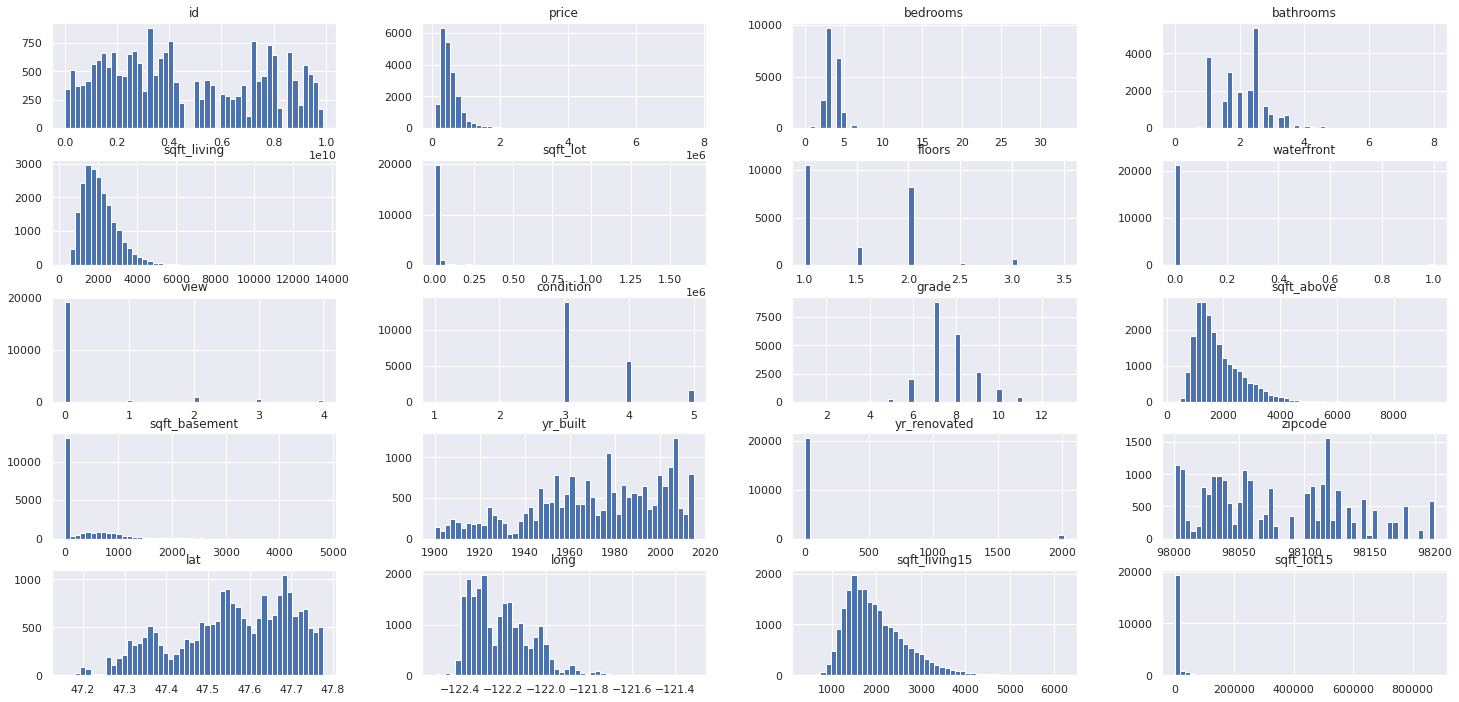

In [50]:
num_attributes.hist(bins = 50);

### Categorical Features

none

# Variable Filtering

In [64]:
df1 = df0.copy()

In [74]:
# filtering bedrooms, the number of bedrooms are not matching the average price by its quantity, and we have only 1 value of each in the dateset, so we can just remove it
df1 = df1[(df1['bedrooms']!= 11) & (df1['bedrooms']!= 33) & (df1['bedrooms']!= 0)]

In [76]:
df1['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
8       13
9        6
10       3
Name: bedrooms, dtype: int64

In [71]:
# number of bedrooms by sqt_living
df1[['bedrooms', 'sqft_living', 'price']].groupby(['bedrooms']).mean().sort_values('sqft_living', ascending = True).reset_index()

,bedrooms,sqft_living,price
0,1,884.938144,3.176806e+05
1,2,1240.540205,4.009255e+05
2,33,1620.000000,6.400000e+05
3,0,1707.846154,4.095038e+05
4,3,1807.596855,4.664825e+05
5,4,2555.997810,6.356486e+05
6,11,3000.000000,5.200000e+05
7,5,3054.823455,7.879964e+05
8,6,3310.758491,8.330025e+05
9,10,3706.666667,8.193333e+05


In [69]:
# count of qty of bedrooms
df1['bedrooms'].value_counts()

3     9731
4     6849
2     2736
5     1586
6      265
1      194
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

# Feature Engineering

In [78]:
df2 = df1.copy()

## Hypothesis Mindmap

## Hypothesis List

## Feature Creation

In [79]:
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
